In [1]:
#@title Basic Libaries { run: "auto" }
#@markdown Getting started with the essential libraries

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
sb.set(style="darkgrid", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.rcParams["figure.figsize"] = (40,10)

# Add-on preferences
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings as wn
wn.simplefilter(action="ignore", category=FutureWarning)

from copy import deepcopy

In [2]:
#@title Global Attributes { run: "auto" }
#@markdown Define environment states

onDrive = False #@param {type:"boolean"}

try:
  import google.colab
  onColab = True

  from google.colab import files
  
  if onDrive:
    from google.colab import drive
    drive.mount('drive')
except ImportError or ModuleNotFoundError:
  onColab = False
  onDrive = False

print(f"Using Google Colab: {onColab}");
print(f"Using Google Drive: {onDrive}");

Using Google Colab: False
Using Google Drive: False


# Data Analysis

---

In [3]:
#@title Set Coin Ticker { run: "auto" }
#@markdown Define the ticker in the data

coinSymbols = 'BTC' #@param ["BTC", "ETH"]{allow-input: true}

# List crypto tickers
coins = [coinSymbols]
coinTickers = [f"{c}-USD" for c in coins]

coinTicker = coinTickers[0]

coinTicker

'BTC-USD'

In [4]:
#@title Data Import { run: "auto" }

fileName = f"{coinTicker.split('-')[0]}-SearchTrend.csv"
importFolderPath = "data" #@param {type:"string"}
if len(importFolderPath) > 0 and not importFolderPath.endswith('/'):
  importFolderPath += '/'

if onColab:
  if onDrive:
    importFolderPath = f'/content/drive/My Drive/{importFolderPath if len(importFolderPath) > 0 else ""}'
  else:
    importFolderPath = f"/content/{importFolderPath if len(importFolderPath) > 0 else ''}"
else:
  BASE_DIR = os.getcwd()
  importFolderPath = os.path.join(BASE_DIR, f"{importFolderPath if len(importFolderPath) > 0 else ''}")
filePath = f'{importFolderPath}{fileName}'

# Import CSV 
try:
  rawData = pd.read_csv(filePath, header=0, index_col=0)
  rawData.index = pd.to_datetime(rawData.index)

  # Preview data
  rawData.tail()
  rawData.shape
except FileNotFoundError:
    print("ERROR - FILE NOT FOUND. [Run 'Data Preprocess' to export the file.]")

,OPEN,HIGH,LOW,CLOSE,VOLUME,BITCOIN,CRYPTOCURRENCY
DATE,,,,,,,
2022-04-16,"40,552.32","40,633.68","40,078.43","40,424.48",16833150693,73.00,54.00
2022-04-17,"40,417.78","40,570.73","39,620.89","39,716.95",19087633042,73.00,54.00
2022-04-18,"39,721.20","40,986.32","38,696.19","40,826.21",33705182072,89.00,65.00
2022-04-19,"40,828.18","41,672.96","40,618.63","41,502.75",25303206547,81.00,53.00
2022-04-20,"41,453.36","42,126.30","41,282.08","41,842.68",27917529088,69.00,48.00


(1936, 7)

## Data Preprocess

---

In [5]:
#@title Data Overview { run: "auto" }

print(f"{'- '*15} INFO {'- '*15}\n")
rawData.info()

print(f"{'- '*15} DESCRIBE {'- '*15}\n")
rawData.describe()

- - - - - - - - - - - - - - -  INFO - - - - - - - - - - - - - - - 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1936 entries, 2017-01-01 to 2022-04-20
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OPEN            1936 non-null   float64
 1   HIGH            1936 non-null   float64
 2   LOW             1936 non-null   float64
 3   CLOSE           1936 non-null   float64
 4   VOLUME          1936 non-null   int64  
 5   BITCOIN         1936 non-null   float64
 6   CRYPTOCURRENCY  1936 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 121.0 KB
- - - - - - - - - - - - - - -  DESCRIBE - - - - - - - - - - - - - - - 



,OPEN,HIGH,LOW,CLOSE,VOLUME,BITCOIN,CRYPTOCURRENCY
count,"1,936.00","1,936.00","1,936.00","1,936.00","1,936.00","1,936.00","1,936.00"
mean,"16,962.48","17,412.36","16,468.55","16,981.25","21,413,865,245.95",63.16,47.44
std,"17,578.72","18,036.84","17,051.36","17,579.51","20,728,933,827.45",13.53,11.86
min,775.18,823.31,755.76,777.76,"60,851,700.00",7.00,11.00
25%,"5,937.57","6,191.92","5,774.10","5,974.36","4,835,379,100.25",56.00,40.00
50%,"8,939.35","9,201.87","8,788.03","8,964.93","17,504,715,049.50",66.00,48.00
75%,"23,539.23","24,066.45","22,808.60","23,747.72","32,510,444,835.50",73.00,56.00
max,"67,549.73","68,789.62","66,382.06","67,566.83","350,967,941,479.00",91.00,80.00


In [6]:
#@title Data Screening { run: "auto" }
#@markdown Check for null values

print('NULL values:',rawData.isnull().values.sum())
print('NA values:',rawData.isnull().values.any())
print('SHAPE:',rawData.shape)

NULL values: 0
NA values: False
SHAPE: (1936, 7)


## Exploratory Analysis

In [7]:
#@title Add-on Libaries { run: "auto" }

if onColab:
  !{sys.executable} -m pip install -q plotly sklearn

import plotly.express as px
# from plotly.offline import plot, iplot, init_notebook_mode
# init_notebook_mode(connected=True)

from sklearn.preprocessing import MinMaxScaler

Text(0.5, 0.98, 'Ticker: BTC-USD [CLOSE]')

<AxesSubplot:xlabel='CLOSE'>

<AxesSubplot:xlabel='CLOSE', ylabel='Density'>

<AxesSubplot:xlabel='CLOSE'>

Text(0.5, 0.98, "Search Term: 'BITCOIN'")

<AxesSubplot:xlabel='BITCOIN'>

<AxesSubplot:xlabel='BITCOIN', ylabel='Density'>

<AxesSubplot:xlabel='BITCOIN'>

Text(0.5, 0.98, "Search Term: 'CRYPTOCURRENCY'")

<AxesSubplot:xlabel='CRYPTOCURRENCY'>

<AxesSubplot:xlabel='CRYPTOCURRENCY', ylabel='Density'>

<AxesSubplot:xlabel='CRYPTOCURRENCY'>

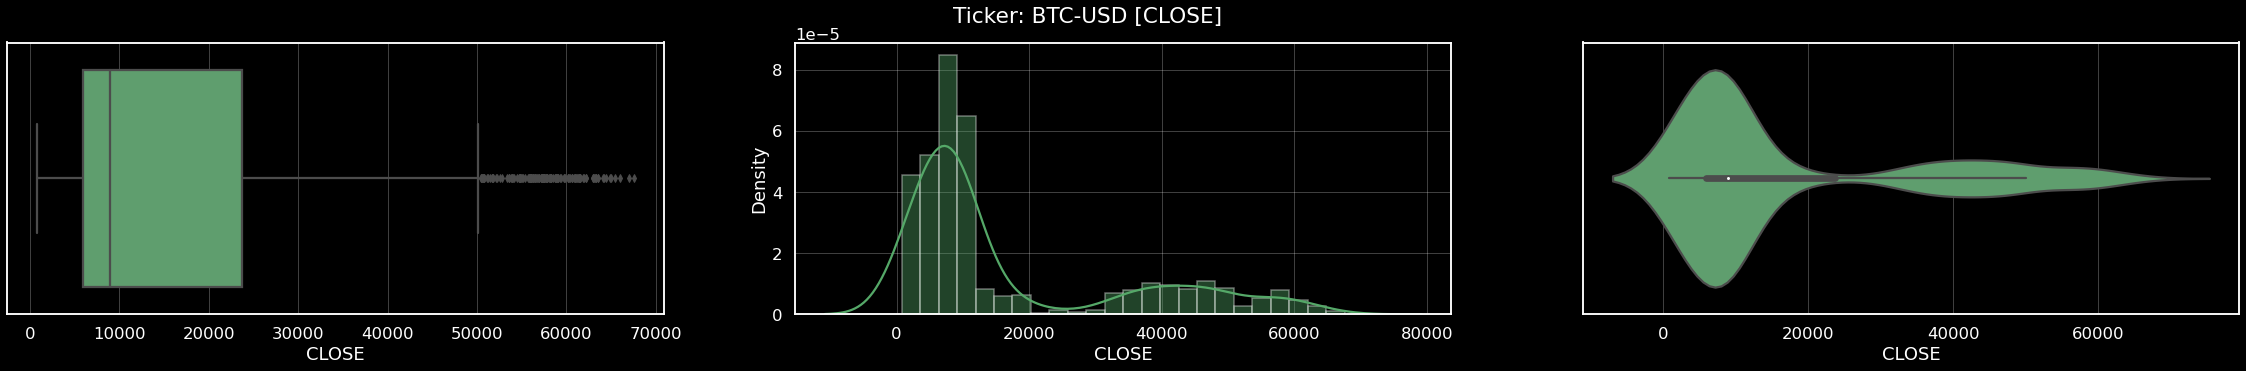

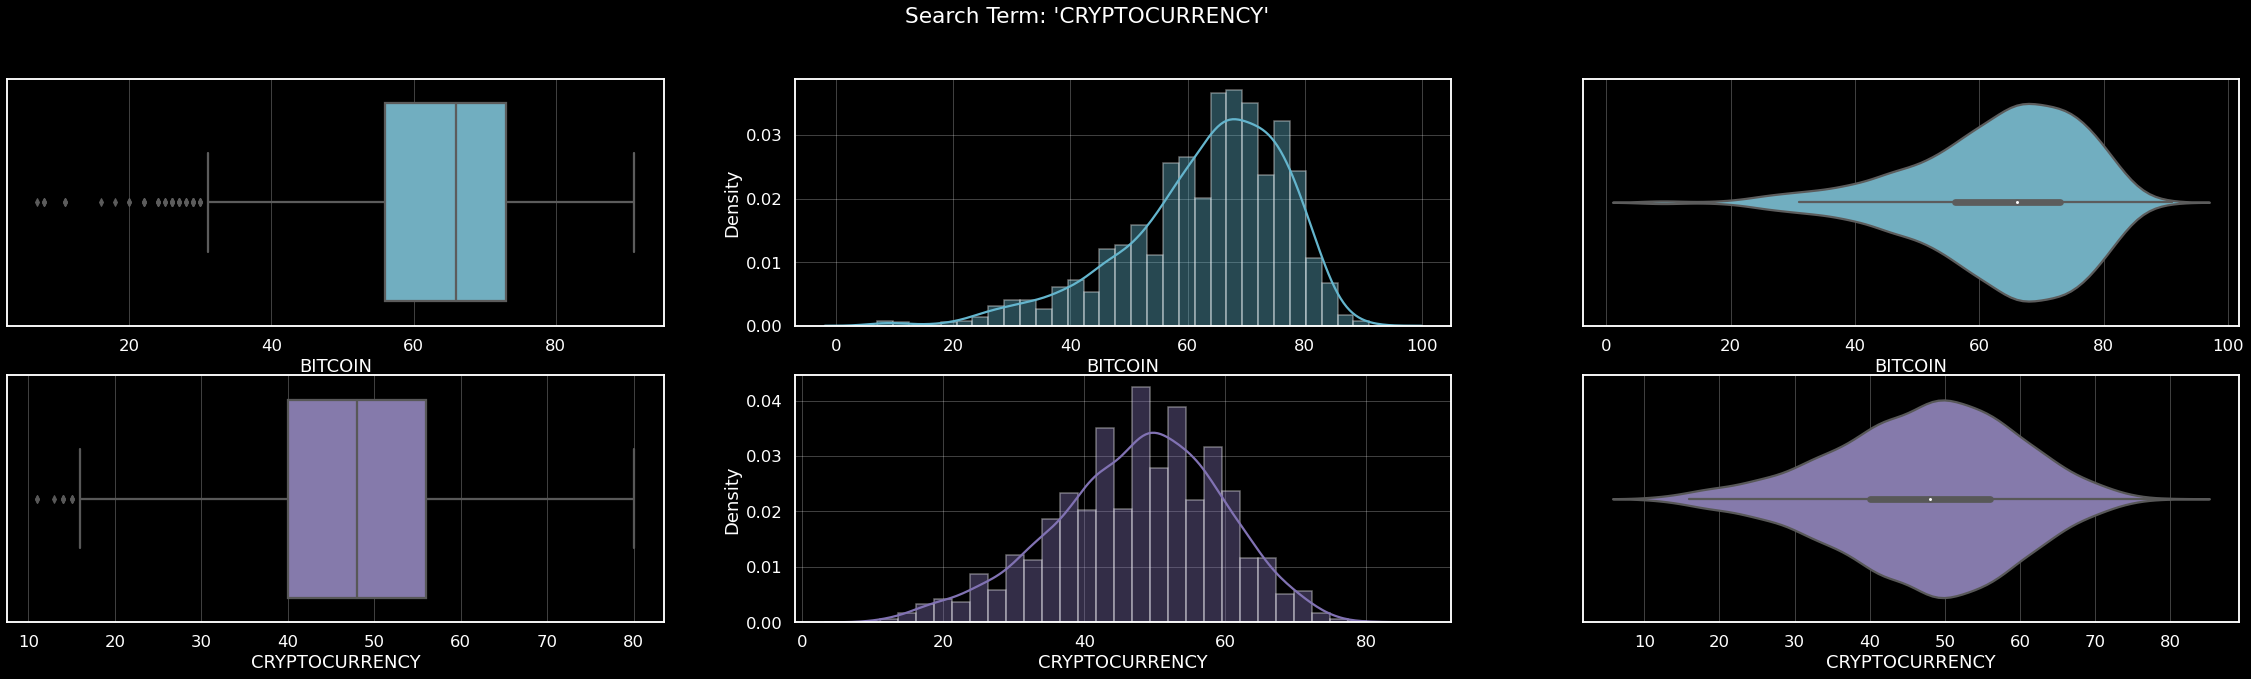

In [8]:
#@title Ticker/Trend Distribution { run: "auto" }
#@markdown Examine the spread of data

data = deepcopy(rawData)
# Filter out predictor columns (Search Terms)
tickerCols = ['Open','High','Low','Close','Volume']
searchCols = list(set(rawData.columns)-set(t.upper() for t in tickerCols))

fg, ax = plt.subplots(1, 3, figsize=(40, 5))
colors = ["r", "g", "b", "m", "c"]

# Plot ticker visualisations
tickerFocusCol = 'CLOSE' #@param ["CLOSE", "OPEN", "HIGH", "LOW"]{allow-input: true}
plt.suptitle(f"Ticker: {coinTicker} [{tickerFocusCol}]")
sb.boxplot(data[tickerFocusCol], orient = "h", color = colors[1], ax = ax[0])
sb.distplot(data[tickerFocusCol], color = colors[1], ax = ax[1])
sb.violinplot(data[tickerFocusCol], color = colors[1], ax = ax[2])

# Plot trend visualisations
fg, ax = plt.subplots(len(searchCols), 3, figsize=(40, 5*len(searchCols)))
for idx, col in enumerate(searchCols):
  focusCol = col

  plt.suptitle(f"Search Term: '{focusCol}'")
  sb.boxplot(data[focusCol], orient = "h", color = colors[len(colors)-1-idx], ax = ax[idx, 0] if len(searchCols) > 1 else ax[0])
  sb.distplot(data[focusCol], color = colors[len(colors)-1-idx], ax = ax[idx, 1] if len(searchCols) > 1 else ax[1])
  sb.violinplot(data[focusCol], color = colors[len(colors)-1-idx], ax = ax[idx, 2] if len(searchCols) > 1 else ax[2])


Text(0.5, 1.0, 'Change in BTC-USD [CLOSE] & Search Trend')

[Text(0, 0.5, '% Change'), Text(0.5, 0, 'Date')]

<AxesSubplot:title={'center':'Change in BTC-USD [CLOSE] & Search Trend'}, xlabel='Date', ylabel='% Change'>

<AxesSubplot:title={'center':'Change in BTC-USD [CLOSE] & Search Trend'}, xlabel='Date', ylabel='% Change'>

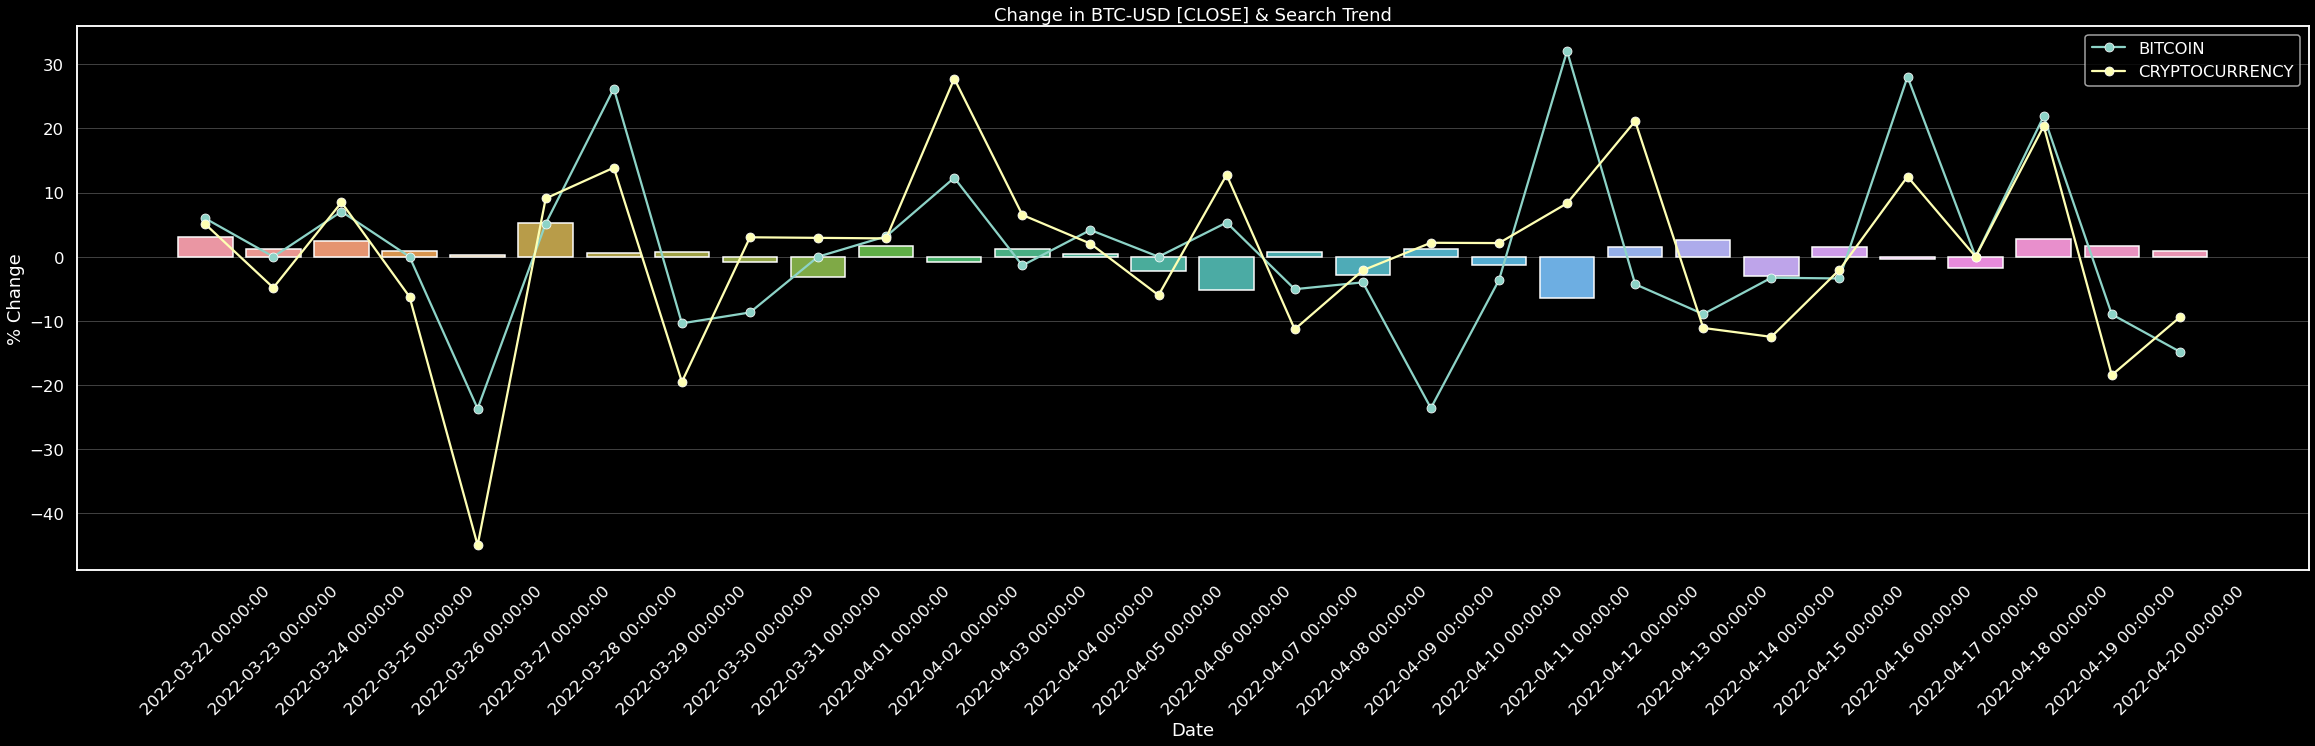

In [9]:
#@title Daily Percentage Change { run: "auto" }
#@markdown Feature engineering with Daily Average Search Percentile

data = deepcopy(rawData)
changeData = deepcopy(data).pct_change(periods=1)*100

ticker = deepcopy(changeData)[[tickerFocusCol]]
trend = deepcopy(changeData)[searchCols]

# Scope the last 30 rows
changeData = changeData.iloc[-30:]

fig, ax = plt.subplots(figsize = (40, 10))
ax.set_title(f"Change in {coinTicker} [{tickerFocusCol}] & Search Trend")

p1 = sb.barplot(data=changeData, x=changeData.index, y=tickerFocusCol, ax=ax)
p1.set(ylabel='% Change', xlabel='Date')
p1 = p1.set_xticklabels(ax.get_xticklabels(), rotation=45)

# get the xtick locations
xticks = ax.get_xticks()
# Plot trend visualisations
for idx, col in enumerate(searchCols):
  focusCol = col
  sb.lineplot(data=changeData, x=xticks, y=focusCol, marker='o', ax=ax, label =focusCol)

plt.show()

<AxesSubplot:>

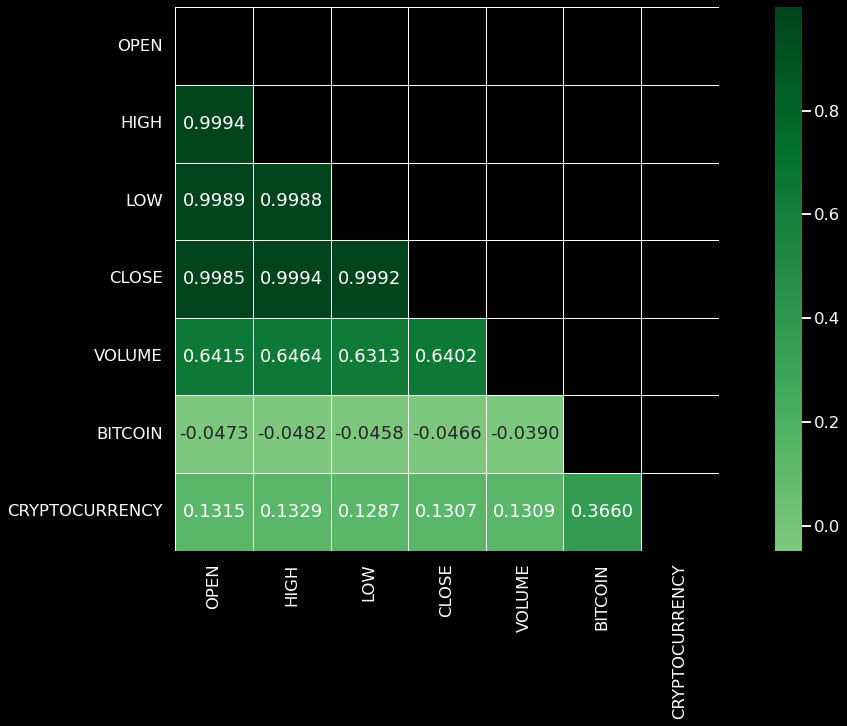

In [10]:
#@title Data Correlation { run: "auto" }
#@markdown The relationship between each variable

data = deepcopy(rawData)

# Correlation
corrData = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrData, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fg, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corrData, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5, cmap="Greens")

,CLOSE,CLOSE-SCALED,BITCOIN,CRYPTOCURRENCY
DATE,,,,
2017-01-01,998.33,0.33,37.00,18.00
2017-01-02,"1,021.75",0.37,61.00,27.00
2017-01-03,"1,043.84",0.40,59.00,34.00
2017-01-04,"1,154.73",0.56,66.00,32.00
2017-01-05,"1,013.38",0.35,82.00,34.00
...,...,...,...,...
2022-04-16,"40,424.48",59.36,73.00,54.00
2022-04-17,"39,716.95",58.30,73.00,54.00
2022-04-18,"40,826.21",59.96,89.00,65.00


<AxesSubplot:xlabel='DATE', ylabel='CLOSE-SCALED'>

<AxesSubplot:xlabel='DATE', ylabel='CLOSE-SCALED'>

<AxesSubplot:xlabel='DATE', ylabel='CLOSE-SCALED'>

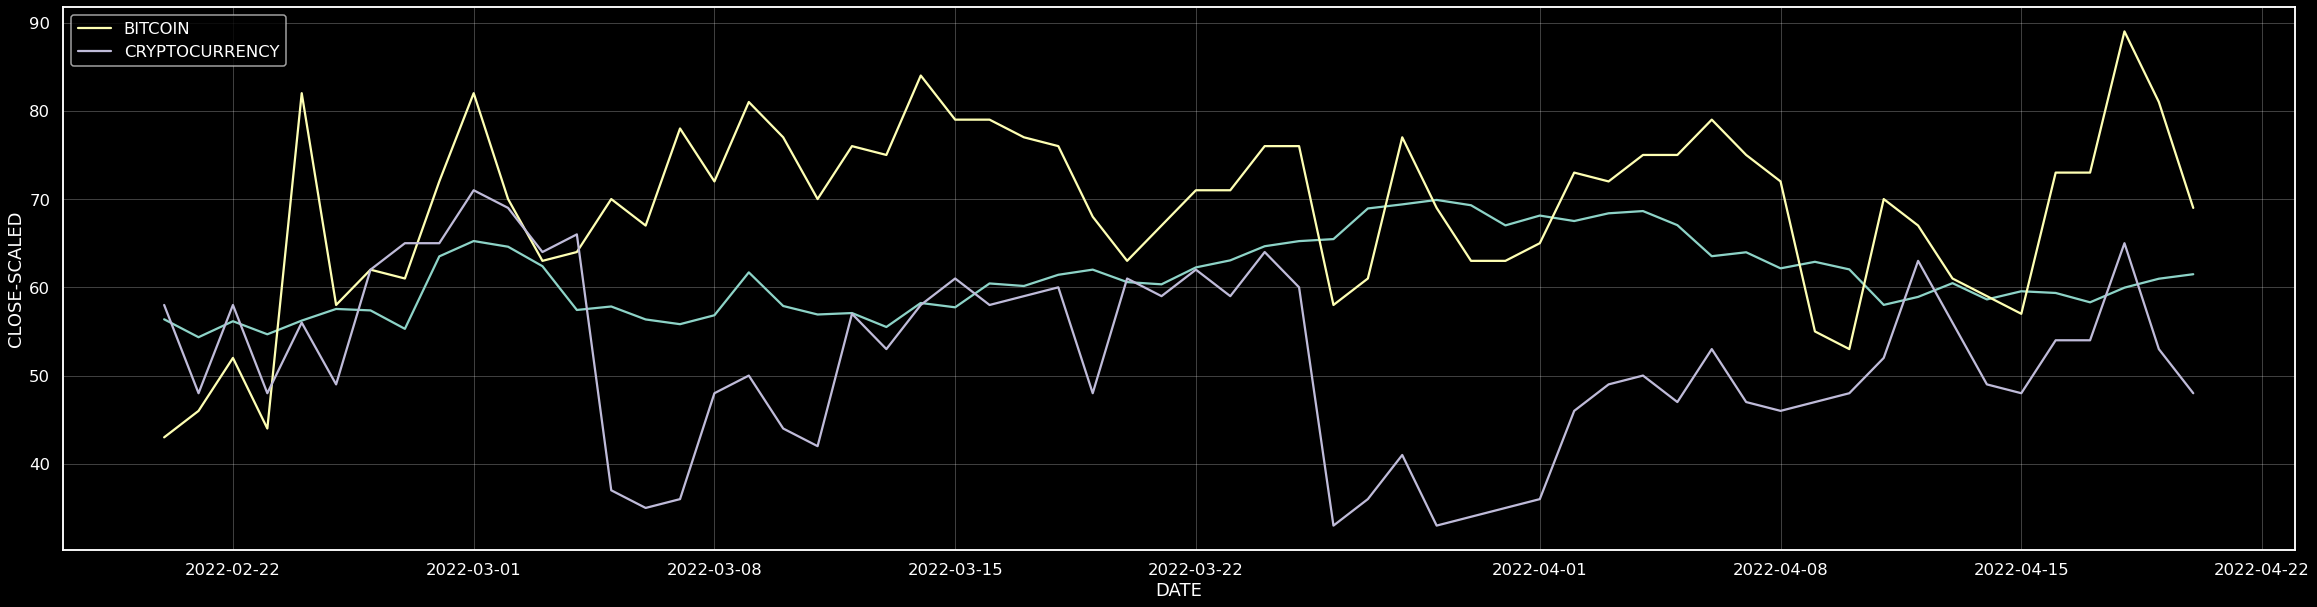

In [11]:
#@title Scaled Time-Series Visualisation { run: "auto" }
#@markdown Examine the trend over time

scaledData = deepcopy(rawData)[[tickerFocusCol, *searchCols]]

# Normalize Ticker dataset
ticker = deepcopy(rawData)[[tickerFocusCol]]
scaledTicker = (MinMaxScaler().fit_transform(ticker.values.reshape(-1, 1))) * 100
scaledData[f"{tickerFocusCol}-SCALED"] = scaledTicker

# Rearrange columns
cols = list(scaledData.columns)
cols = cols[0::3] + cols[1:-1]
scaledData = scaledData[cols]
scaledData

# Scope the last 30 rows
# data = scaledData.iloc[-60:]
data = deepcopy(scaledData)[[col for col in scaledData.columns if col != tickerFocusCol]]

showTimeRange = False #@param {type:"boolean"}

if showTimeRange:
  fig = px.line(data, x=data.index, y=data.columns, title=f'{coinTicker} Prediction Comparison')
  fig.update_xaxes(
      rangeslider_visible=True,
      rangeselector=dict(
          buttons=list([
              dict(count=1, label="1m", step="month", stepmode="backward"),
              dict(count=6, label="6m", step="month", stepmode="backward"),
              dict(count=1, label="YTD", step="year", stepmode="todate"),
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(step="all")
          ])
      )
  )
else:
  data = data.iloc[-60:]
  fg, ax = plt.subplots(figsize=(40, 10))
  sb.lineplot(data=data, x=data.index, y=f"{tickerFocusCol}-SCALED")

  # Plot trend visualisations
  for idx, col in enumerate(searchCols):
    focusCol = col
    sb.lineplot(data=data, x=data.index, y=focusCol, ax=ax, label=focusCol)


<AxesSubplot:>

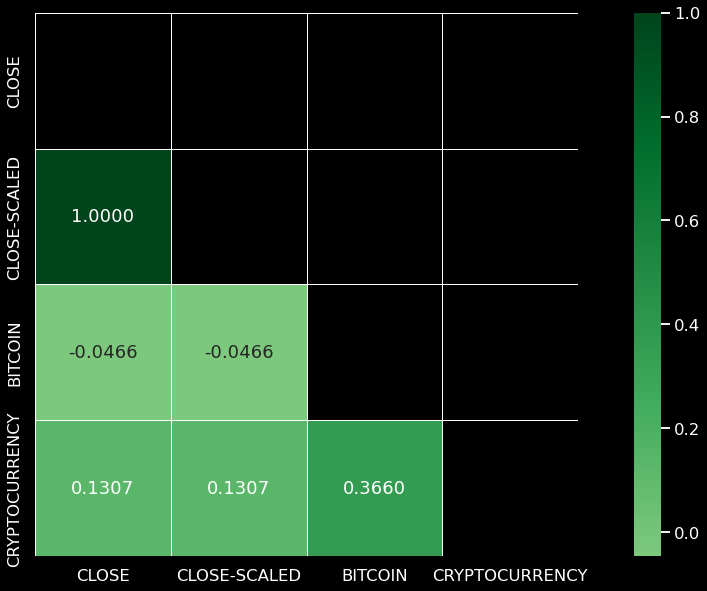

In [12]:
#@title Scaled Data Correlation { run: "auto" }
#@markdown The relationship between each variable

data = deepcopy(scaledData)

# Correlation
corrData = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrData, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fg, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corrData, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5, cmap="Greens")

---